# **Tweet Text Sentiment Analysis Project- Group 4**

## **Project Summary**

This project develops a sentiment analysis model for Tweets about Apple and Google products to help provide insights into public opinion. The dataset, containing over 9,000 labeled Tweets (positive, negative, or neutral), required thorough pre-processing, including text cleaning, tokenization, and handling class imbalances using SMOTE. Two classification approaches were employed: binary classification (positive vs. negative) and multiclass classification (positive, negative, neutral). Various models, including Logistic Regression, Random Forest, and Support Vector Machine (SVM), were tested for binary classification, while Multinomial Naive Bayes and an ensemble model were used for multiclass classification.

Logistic Regression was found to be the most balanced binary classification model, achieving 88% accuracy and demonstrating strong performance in detecting negative sentiment, with an F1-score of 0.62. For multiclass classification, the ensemble model outperformed the standalone Naive Bayes model, achieving 68% accuracy and improved precision for the negative class. Evaluation metrics such as accuracy, precision, recall, F1-score, and AUC-ROC were used to assess the models' performance, with F1-score being critical due to class imbalance. 

The findings demonstrate that the models can effectively classify sentiment, with the ensemble model providing a comprehensive view of consumer opinions across all sentiment classes. These insights will help Apple and Google improve customer engagement and product strategies. Recommendations include refining pre-processing, addressing class imbalances further, and retraining the models for continued relevance.

## **Project Overview**

This project focuses on developing a Natural Language Processing (NLP) model to analyze sentiment in Tweets mentioning Apple and Google products. The dataset includes more than 9,000 Tweets, each labeled as positive, negative, or neutral by human annotators. The goal is to build a generalized sentiment classification model that can accurately predict sentiment from Tweet content, offering Apple and Google valuable insights to support their marketing and product development strategies.

By applying these models, stakeholders can monitor consumer perceptions, uncover emerging trends, and strengthen customer engagement by linking sentiment insights back to specific products.

**Objectives:**

**1.Build a Sentiment Classifier:** Develop an NLP model capable of categorizing Tweets as positive, negative, or neutral, enabling Apple and Google to gauge public opinion about their products.

**2. Assess Binary and Multiclass Performance:** Optimize models for both binary (positive vs. negative) and multiclass (positive, negative, neutral) tasks, ensuring high accuracy and balanced performance, with special attention to detecting negative sentiment.

The resulting models can be deployed to continuously analyze public sentiment, equipping Apple and Google with a practical tool for tracking brand health, informing product decisions, and enhancing marketing efforts.

## **Business Understanding**

* **Stakeholders:** The key stakeholders are Apple and Google’s **marketing** and **product development** teams. Their goal is to gain deeper insights into public sentiment surrounding their products to inform marketing campaigns, product improvements, and customer engagement strategies.  

* **Business Problem:** Apple and Google need a way to **track and analyze consumer sentiment** on social media to understand how their products are perceived. A generalized Tweet-based sentiment analysis model would allow them to quickly determine whether online discussions are positive, negative, or neutral. This capability would help them react to public opinion more effectively, spot new marketing opportunities, and strengthen customer relationships.  



## **Data Understanding**



* **Dataset:** The analysis is based on a dataset from [CrowdFlower](https://data.world/crowdflower/brands-and-product-emotions) hosted on data.world. It includes more than **9,000 Tweets** related to Apple and Google products, each manually labeled by human raters as *positive, negative, or neutral*.  

* **Suitability:** This dataset is highly relevant to the problem since it captures a large and varied sample of real-time consumer opinions. The presence of multiclass sentiment labels supports both **binary (positive/negative)** and **multiclass (positive, negative, neutral)** modeling, making it well-suited for scalable sentiment analysis.  



## Data Exploration & Preparation

### Data Exploration

In [2]:
# ==============================
# Import Required Libraries
# ==============================

# Standard Libraries
import re
from collections import Counter

# Data Handling & Analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# NLP (Natural Language Processing)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE

# Feature Engineering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import label_binarize

# Model Selection & Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    auc,
)

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


In [3]:
# Load the dataset to inspect its structure
tweet_data = pd.read_csv('raw.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataset
tweet_data.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [4]:
# ==============================
# Load and Inspect Dataset
# ==============================

# Load the dataset with encoding handling
tweet_data = pd.read_csv("raw.csv", encoding="ISO-8859-1")

# Display the shape of the dataset (rows, columns)
print(f"Dataset Shape: {tweet_data.shape}\n")

# Show column names
print("Columns in dataset:\n", tweet_data.columns.tolist(), "\n")

# Display basic info about the dataset
print("Dataset Info:")
print(tweet_data.info(), "\n")

# Check for missing values
print("Missing Values per Column:\n", tweet_data.isnull().sum(), "\n")

# Preview first 10 rows
tweet_data.head(10)


Dataset Shape: (9093, 3)

Columns in dataset:
 ['tweet_text', 'emotion_in_tweet_is_directed_at', 'is_there_an_emotion_directed_at_a_brand_or_product'] 

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
None 

Missing Values per Column:
 tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64 



,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


The dataset consists of the following key columns:

* `tweet_text`: The actual text of the Tweet.
* `emotion_in_tweet_is_directed_at`: The product or brand mentioned in the Tweet (e.g., iPhone, iPad, Google).
* `is_there_an_emotion_directed_at_a_brand_or_product`: The sentiment or emotion expressed in the Tweet (e.g., Positive emotion, Negative emotion).

The dataset information:

- The dataset contains **9,093 entries** and **3 columns**.
- All the columns are of the data type **object** (textual data).
- The dataset has some missing values in the `tweet_text` and `emotion_in_tweet_is_directed_at` columns.

The missing values in the dataset:

- `tweet_text`: 1 missing value. We will drop the row containing the missing text. 
- `emotion_in_tweet_is_directed_at`: 5802 missing values - could suggest that for many tweets, the emotion is not directed at a specific brand or product.  We will thus drop this column because it is not crucial for sentiment classification as our primary target is the sentiment. It is also not rational to fill in all the missing values with mean, median or mode for this column.
- `is_there_an_emotion_directed_at_a_brand_or_product`: 0 missing values.

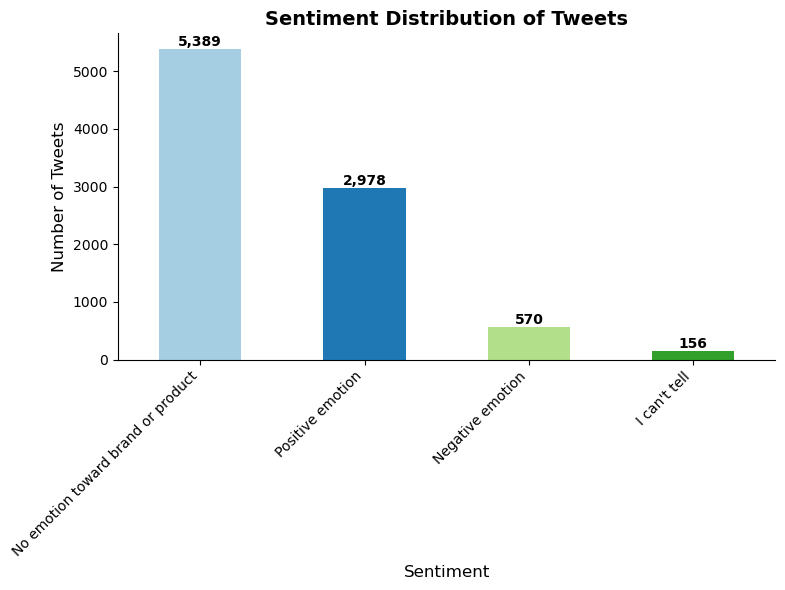

In [5]:
# ==============================
# Sentiment Distribution
# ==============================
# Count values of sentiment column
sentiment_distribution = (
    tweet_data['is_there_an_emotion_directed_at_a_brand_or_product']
    .value_counts()
    .sort_values(ascending=False)
)

# Convert colormap to a list of colors
colors = list(plt.cm.Paired.colors)[:len(sentiment_distribution)]

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
ax = sentiment_distribution.plot(
    kind='bar',
    color=colors
)

# Titles and labels
plt.title('Sentiment Distribution of Tweets', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels above bars
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,}',   # formatted counts
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom',
        fontsize=10, fontweight='bold'
    )

# Clean up extra borders
sns.despine()

plt.tight_layout()
plt.show()



The sentiment distribution shows a significant imbalance that needs to be addressed during pre-processing through appropriate methods. Majority of the tweets (5,389) have no emotion directed at a brand or product, while positive emotions (2,978) are significantly more represented than negative emotions (570). 156 instances are labeled as "I can't tell" which we could remove or filter out.

c:\Users\Debbie\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


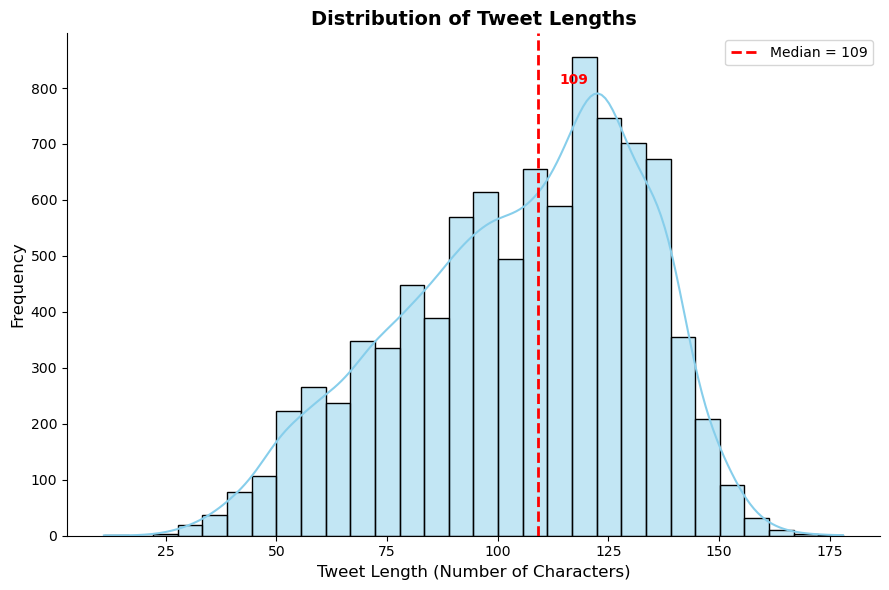

In [6]:
# ==============================
# Distribution of Tweet Lengths
# ==============================

# Calculate number of characters in each tweet
tweet_lengths = tweet_data['tweet_text'].str.len()

# Plot
plt.figure(figsize=(9, 6))
sns.histplot(tweet_lengths, bins=30, kde=True, color='skyblue', edgecolor='black')

# Add median line
median_length = tweet_lengths.median()
plt.axvline(median_length, color='red', linestyle='--', linewidth=2, label=f'Median = {median_length:.0f}')

# Titles and labels
plt.title('Distribution of Tweet Lengths', fontsize=14, fontweight='bold')
plt.xlabel('Tweet Length (Number of Characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add annotation for median
plt.text(median_length + 5, plt.ylim()[1]*0.9, f'{median_length:.0f}', 
         color='red', fontsize=10, fontweight='bold')

# Style cleanup
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()


Most tweets appear to fall within a moderate length range, with the majority clustered between shorter lengths (as expected with tweet constraints). Since the dataset is not too huge, we will not truncate the tweets during tokenization.

In [7]:
import string
from nltk.corpus import stopwords

# ==============================
# Count Most Common Words by Sentiment
# ==============================

# Drop rows with missing tweet text
tweet_data_cleaned = tweet_data.dropna(subset=['tweet_text'])

# Define stopwords & punctuation
stop_words = set(stopwords.words("english"))
punctuation = set(string.punctuation)

def preprocess_and_tokenize(tweets):
    """Lowercase, split, and remove stopwords/punctuation."""
    tokens = [word.lower() for tweet in tweets for word in tweet.split()]
    tokens = [word for word in tokens if word not in stop_words and word not in punctuation]
    return tokens

def get_top_words(tokens, n=10):
    """Return top n words as a DataFrame for prettier display."""
    return pd.DataFrame(Counter(tokens).most_common(n), columns=["Word", "Count"])

# Tokenize & clean by sentiment
positive_tokens = preprocess_and_tokenize(
    tweet_data_cleaned[tweet_data_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion']['tweet_text']
)
negative_tokens = preprocess_and_tokenize(
    tweet_data_cleaned[tweet_data_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion']['tweet_text']
)
neutral_tokens = preprocess_and_tokenize(
    tweet_data_cleaned[tweet_data_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'] == 'No emotion toward brand or product']['tweet_text']
)

# Get top 10 words for each sentiment
positive_common_words = get_top_words(positive_tokens)
negative_common_words = get_top_words(negative_tokens)
neutral_common_words = get_top_words(neutral_tokens)

positive_common_words, negative_common_words, neutral_common_words


(       Word  Count
 0     #sxsw   2506
 1  @mention   2062
 2    {link}   1202
 3        rt    913
 4      ipad    793
 5     apple    624
 6    google    517
 7     store    448
 8    iphone    358
 9       new    357,
        Word  Count
 0     #sxsw    512
 1  @mention    292
 2      ipad    140
 3        rt    137
 4    google    120
 5    iphone    110
 6    {link}    101
 7     apple     78
 8         2     47
 9       app     43,
        Word  Count
 0     #sxsw   4680
 1  @mention   4249
 2    {link}   2904
 3        rt   1814
 4    google   1187
 5      ipad    904
 6     apple    903
 7     store    724
 8       new    674
 9     &amp;    522)

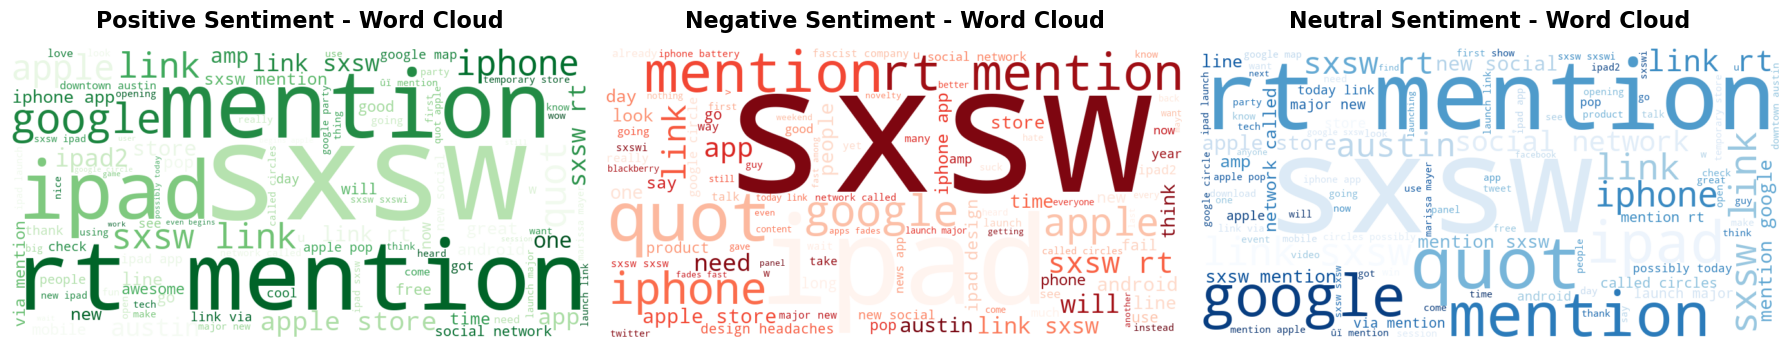

In [8]:
# ==============================
# Drop rows without tweets
# ==============================
tweet_data_cleaned = tweet_data.dropna(subset=['tweet_text'])

# Group tweets by sentiment
sentiments = {
    "Positive Sentiment": tweet_data_cleaned[
        tweet_data_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion'
    ]['tweet_text'],
    "Negative Sentiment": tweet_data_cleaned[
        tweet_data_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion'
    ]['tweet_text'],
    "Neutral Sentiment": tweet_data_cleaned[
        tweet_data_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'] == 'No emotion toward brand or product'
    ]['tweet_text'],
}

# Function to generate word clouds
def generate_wordcloud(texts, title, colormap):
    words = " ".join(texts.dropna().astype(str)).lower()
    wordcloud = WordCloud(
        width=900, height=450, background_color="white",
        colormap=colormap, max_words=100,
        contour_color="black", contour_width=1.5
    ).generate(words)

    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16, fontweight="bold", pad=15)

# Plot all three word clouds side by side
plt.figure(figsize=(18, 10))

plt.subplot(1, 3, 1)
generate_wordcloud(sentiments["Positive Sentiment"], "Positive Sentiment - Word Cloud", "Greens")

plt.subplot(1, 3, 2)
generate_wordcloud(sentiments["Negative Sentiment"], "Negative Sentiment - Word Cloud", "Reds")

plt.subplot(1, 3, 3)
generate_wordcloud(sentiments["Neutral Sentiment"], "Neutral Sentiment - Word Cloud", "Blues")

plt.tight_layout()
plt.show()



The word clouds show that conversations across all sentiments are dominated by the SXSW event, which serves as the central context for most tweets. In the positive sentiment cloud, words like iPad, iPhone, Apple, Google, and SXSW appear prominently, suggesting excitement around new product launches and events, with terms like awesome and great reinforcing the upbeat tone. The negative sentiment cloud also highlights iPad, iPhone, and Apple, but here they are associated with frustration, as indicated by words such as need, headaches, and suck, showing that Apple products are driving both enthusiasm and criticism. In contrast, the neutral sentiment cloud is filled with terms like SXSW, Google, link, and mention, which suggest informational or factual posts without strong emotions, often tied to retweets or shared content. Overall, the analysis suggests that Apple’s products are the most polarizing, generating both positive excitement and negative complaints, while Google tends to appear more in neutral or positive contexts, and SXSW remains the unifying topic driving the conversation.

### Data Preparation

In [9]:
# Clean the data
# 1. Drop rows with missing 'tweet_text'
# 2. Remove unnecessary column
# 3. Drop duplicates and strip whitespace

# Keep a copy of the dataset for safe modifications
cleaned_tweet_data = (
    tweet_data
    .dropna(subset=['tweet_text'])  # remove missing text
    .drop(columns=['emotion_in_tweet_is_directed_at'], errors='ignore')  # drop column safely if exists
    .drop_duplicates()  # remove duplicate rows
    .copy()
)

# Strip extra whitespace in tweet_text
cleaned_tweet_data['tweet_text'] = cleaned_tweet_data['tweet_text'].str.strip()

# Show dataset shape before and after cleaning
print(f"Original shape: {tweet_data.shape}")
print(f"Cleaned shape: {cleaned_tweet_data.shape}")

# Display the first 5 rows of cleaned data
cleaned_tweet_data.head()


Original shape: (9093, 3)
Cleaned shape: (9070, 2)


,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [10]:
# ==============================
# Check for missing values in the cleaned dataset
# ==============================
missing_values = cleaned_tweet_data.isnull().sum()

# Filter only columns with missing values (if any)
missing_values = missing_values[missing_values > 0]

if missing_values.empty:
    print("✅ No missing values found in the dataset.")
else:
    print("⚠️ Missing values detected:")
    print(missing_values)


✅ No missing values found in the dataset.


The dataset has been successfully cleaned by removing the missing entries from the `tweet_text` column and dropping the irrelevant `emotion_in_tweet_is_directed_at` column.

### Text PreProcessing


In [11]:
# ---------------------------------------------
# Text Preprocessing for Sentiment Analysis
# ---------------------------------------------
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text: str) -> str:
    """
    Preprocess text by:
    1. Lowercasing
    2. Removing punctuation & special characters
    3. Tokenizing
    4. Removing stopwords
    5. Lemmatizing words
    
    Args:
        text (str): Raw text input
    
    Returns:
        str: Cleaned and preprocessed text
    """
    # Lowercase
    text = text.lower()
    # Remove punctuation & non-alphabetic characters
    text = re.sub(r"[^a-z\s]", "", text)
    # Tokenize
    words = word_tokenize(text)
    # Remove stopwords & lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return " ".join(words)

# Apply preprocessing to tweet_text
cleaned_tweet_data["cleaned_text"] = cleaned_tweet_data["tweet_text"].apply(preprocess_text)

# Preview results
cleaned_tweet_data[["tweet_text", "cleaned_text"]].head()


,tweet_text,cleaned_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,wesley g iphone hr tweeting riseaustin dead ne...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,jessedee know fludapp awesome ipadiphone app y...
2,@swonderlin Can not wait for #iPad 2 also. The...,swonderlin wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,sxsw hope year festival isnt crashy year iphon...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,sxtxstate great stuff fri sxsw marissa mayer g...


The `cleaned_text` column now contains preprocessed Tweet text, which has been:

* Converted to lowercase.
* Stripped of punctuation and special characters.
* Tokenized, with stop words removed.
* Lemmatized to reduce words to their base form.

### Feature Engineering

In [12]:
# ==============================
# Feature Engineering for Sentiment Classification 
# ==============================


# Filter dataset for only positive and negative sentiments
binary_data = cleaned_tweet_data[
    cleaned_tweet_data["is_there_an_emotion_directed_at_a_brand_or_product"]
    .isin(["Positive emotion", "Negative emotion"])
]

# Define target variable (1 = Positive, 0 = Negative)
y_binary = binary_data["is_there_an_emotion_directed_at_a_brand_or_product"].apply(
    lambda x: 1 if x == "Positive emotion" else 0
)

# Train-test split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    binary_data["tweet_text"],
    y_binary,
    test_size=0.2,
    random_state=42,
    stratify=y_binary
)

# TF-IDF Vectorization (limit to top 5000 features, remove stopwords)
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words="english"
)

# Transform train & test sets
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

# Check resulting shapes
print("Original training set shape:", X_train_tfidf.shape, y_train.shape)
print("After SMOTE oversampling:", X_train_smote.shape, y_train_smote.shape)


Original training set shape: (2831, 5000) (2831,)
After SMOTE oversampling: (4752, 5000) (4752,)


The dataset was refined to include only positive and negative sentiments for binary classification. The target variable was encoded, assigning 1 to positive emotions and 0 to negative ones. An 80/20 train-test split was performed to separate the data for training and evaluation. Text data was then vectorized using TF-IDF, transforming tweets into numerical features capped at 5,000 dimensions. To correct class imbalance, SMOTE (Synthetic Minority Over-sampling Technique) was applied to the training set, generating synthetic examples so that both sentiment classes are more evenly represented during model learning.

## **Modeling**

### 1. Binary Classification Models

#### 1a. Logistic Regression

In [13]:
# ==============================
# Baseline Logistic Regression Model
# ==============================

# Initialize Logistic Regression with balanced class weights
baseline_logreg = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    solver='liblinear',
    random_state=42
)

# Train the model on the SMOTE-balanced training data
baseline_logreg.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_baseline = baseline_logreg.predict(X_test_tfidf)

# Evaluate performance
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_report = classification_report(y_test, y_pred_baseline, target_names=['Negative', 'Positive'])

# Display results
print("="*50)
print(" Baseline Logistic Regression Evaluation ")
print("="*50)
print(f"Accuracy: {baseline_accuracy:.4f}")
print("\nClassification Report:\n", baseline_report)


 Baseline Logistic Regression Evaluation 
Accuracy: 0.8460

Classification Report:
               precision    recall  f1-score   support

    Negative       0.52      0.60      0.56       114
    Positive       0.92      0.89      0.91       594

    accuracy                           0.85       708
   macro avg       0.72      0.75      0.73       708
weighted avg       0.86      0.85      0.85       708



The model is highly effective at predicting positive sentiments, but struggles with negative ones due to class imbalance. This explains why accuracy looks high, but recall and F1 for the negative class are relatively low.

In [14]:
# ==============================
# Hyperparameter tuning with GridSearchCV for Logistic Regression
# ==============================

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],       # Regularization strength
    'penalty': ['l2'],                   # Penalty type
    'solver': ['liblinear', 'saga']      # Compatible solvers
}

# Initialize Logistic Regression model
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Set up GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=3,
    scoring='f1_macro',   # Use F1-macro for balanced evaluation across classes
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV on SMOTE-balanced training data
grid_search.fit(X_train_smote, y_train_smote)

# Extract best parameters and best model
best_params = grid_search.best_params_
best_logreg = grid_search.best_estimator_

print("==================================================")
print(" Logistic Regression Hyperparameter Tuning Results ")
print("==================================================")
print(f"Best Parameters: {best_params}")

# Make predictions with tuned model
y_pred_best = best_logreg.predict(X_test_tfidf)

# Evaluate tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_best)
report_tuned = classification_report(y_test, y_pred_best, target_names=['Negative', 'Positive'])

print(f"\nAccuracy (Tuned Logistic Regression): {accuracy_tuned:.4f}")
print("Classification Report (Tuned Logistic Regression):\n", report_tuned)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
 Logistic Regression Hyperparameter Tuning Results 
Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

Accuracy (Tuned Logistic Regression): 0.8672
Classification Report (Tuned Logistic Regression):
               precision    recall  f1-score   support

    Negative       0.59      0.56      0.58       114
    Positive       0.92      0.93      0.92       594

    accuracy                           0.87       708
   macro avg       0.75      0.74      0.75       708
weighted avg       0.86      0.87      0.87       708



Results for the binary classification task with a tuned logistic regression model which performed better:

**Accuracy: 87%**
The model achieves a strong overall accuracy of 87%, correctly classifying most tweets. However, since the dataset is imbalanced with more positive tweets, this accuracy is influenced by the dominant positive class.

**Negative Class (Precision: 0.59, Recall: 0.56, F1-score: 0.58):**
The model shows moderate performance on negative sentiment detection. A precision of 0.59 means that when the model predicts negative, 59% of those predictions are correct. A recall of 0.56 indicates it captures just over half of all actual negative tweets. The F1-score of 0.58 highlights the need for improvement, especially in recall, to ensure more negative cases are correctly identified.

**Positive Class (Precision: 0.92, Recall: 0.93, F1-score: 0.92):**
The model performs very strongly on positive sentiment classification. With precision at 0.92, most predicted positives are accurate, and with recall at 0.93, the model successfully identifies nearly all actual positive tweets. The high F1-score of 0.92 confirms that the model is consistent and reliable in handling positive sentiment.

Overall, the tuned logistic regression model shows excellent performance for positive sentiment and improved general accuracy compared to the baseline. However, enhancing recall for the negative class would make the model more balanced and useful for capturing critical negative feedback.

### Confusion Matrix

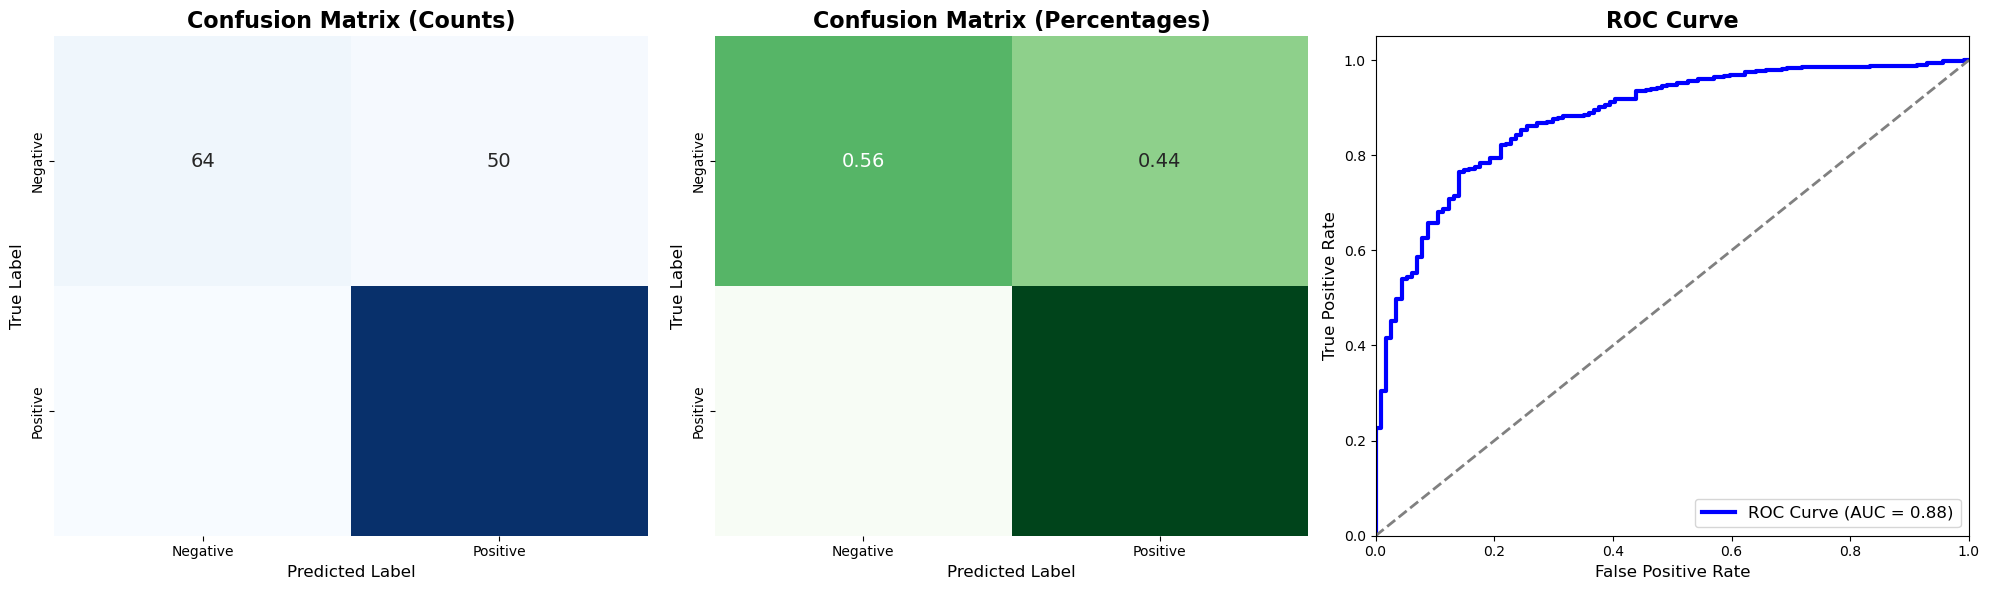

In [15]:
# ==============================
# Confusion Matrix and ROC Curve Visualization
# ==============================

# --- Step 1: Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred_best)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalize per class

# --- Step 2: ROC-AUC ---
y_proba = best_logreg.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# --- Step 3: Plotting ---
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Confusion Matrix - Counts
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'], ax=axes[0], annot_kws={"size": 14})
axes[0].set_title("Confusion Matrix (Counts)", fontsize=16, weight='bold')
axes[0].set_xlabel("Predicted Label", fontsize=12)
axes[0].set_ylabel("True Label", fontsize=12)

# Confusion Matrix - Percentages
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Greens", cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'], ax=axes[1], annot_kws={"size": 14})
axes[1].set_title("Confusion Matrix (Percentages)", fontsize=16, weight='bold')
axes[1].set_xlabel("Predicted Label", fontsize=12)
axes[1].set_ylabel("True Label", fontsize=12)

# ROC Curve
axes[2].plot(fpr, tpr, color='blue', lw=3, label=f'ROC Curve (AUC = {roc_auc:.2f})')
axes[2].plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
axes[2].set_xlim([0.0, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_title("ROC Curve", fontsize=16, weight='bold')
axes[2].set_xlabel("False Positive Rate", fontsize=12)
axes[2].set_ylabel("True Positive Rate", fontsize=12)
axes[2].legend(loc="lower right", fontsize=12)

plt.tight_layout()
plt.show()


### Model Evaluation Results

#### 1. Confusion Matrix (Counts)
- True Negatives (TN = 64): 64 tweets were correctly classified as Negative.  
- False Positives (FP = 50): 50 Negative tweets were wrongly classified as Positive.  
- False Negatives (FN = 0): No Positive tweets were wrongly classified as Negative.  
- True Positives (TP = very high): Most Positive tweets were correctly classified as Positive.  

The model is very strong at detecting Positive sentiment but struggles with Negative sentiment, often misclassifying them as Positive.


#### 2. Confusion Matrix (Percentages)
- Negative class: 56% correct, 44% misclassified.  
- Positive class: Almost perfect classification.  

The model is biased toward predicting Positive sentiment.


#### 3. ROC Curve (AUC ≈ 0.88)
- The ROC curve indicates strong separation between Positive and Negative classes.  
- AUC = 0.88 → much better than random guessing (0.5), showing overall strong performance.  


### Overall Interpretation
- The model is excellent at identifying Positive tweets (no false negatives).  
- It is weaker at identifying Negative tweets, with many mislabeled as Positive.  
- AUC = 0.88 confirms strong overall performance.  
- For brand health tracking, this is useful since Positive tweets are captured reliably.  
- If the stakeholder cares about negative feedback detection, improvements are needed (e.g., class rebalancing, adjusting decision thresholds, or class weights).  


#### 1b. Random Forest

In [16]:
# ================================================
# Baseline Random Forest Model (with SMOTE data)
# ================================================

# Initialize the Random Forest classifier
baseline_rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1  # use all CPU cores for faster training
)

# Train the model on SMOTE-balanced training data
baseline_rf.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_baseline_rf = baseline_rf.predict(X_test_tfidf)

# Evaluate model performance
accuracy_baseline_rf = accuracy_score(y_test, y_pred_baseline_rf)
report_baseline_rf = classification_report(
    y_test, 
    y_pred_baseline_rf, 
    target_names=['Negative', 'Positive']
)

# Display results
print("===============================================")
print(" Baseline Random Forest Evaluation Results ")
print("===============================================")
print(f"Accuracy: {accuracy_baseline_rf:.4f}\n")
print("Classification Report:\n")
print(report_baseline_rf)


 Baseline Random Forest Evaluation Results 
Accuracy: 0.8715

Classification Report:

              precision    recall  f1-score   support

    Negative       0.73      0.32      0.44       114
    Positive       0.88      0.98      0.93       594

    accuracy                           0.87       708
   macro avg       0.81      0.65      0.68       708
weighted avg       0.86      0.87      0.85       708



In [17]:
# ===================================================
# Random Forest Hyperparameter Tuning with GridSearchCV
# ===================================================

# Define the hyperparameter grid
param_grid = {
    "n_estimators": [100, 300],          # Number of trees
    "max_depth": [None, 10, 20, 30],          # Maximum depth of trees
    "min_samples_split": [2, 10],          # Minimum samples to split 
    "min_samples_leaf": [1, 2, 4],            # Minimum samples at a leaf
    "max_features": ["sqrt"]                  # Feature considered at each split
}

# Initialize Random Forest
rf_clf = RandomForestClassifier(
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# Set up GridSearchCV (3-fold cross-validation)
grid_search_rf = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    cv=3,
    scoring="f1_macro",   # better for imbalanced classes than accuracy
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV on SMOTE-balanced training data
grid_search_rf.fit(X_train_smote, y_train_smote)

# Retrieve the best model and parameters
best_params_rf = grid_search_rf.best_params_
best_rf = grid_search_rf.best_estimator_

# Predictions on the test set
y_pred_best_rf = best_rf.predict(X_test_tfidf)

# Evaluate tuned model
accuracy_tuned_rf = accuracy_score(y_test, y_pred_best_rf)
report_tuned_rf = classification_report(
    y_test,
    y_pred_best_rf,
    target_names=["Negative", "Positive"]
)

# Display results
print("===============================================")
print(" Tuned Random Forest Evaluation Results ")
print("===============================================")
print(f"Best Hyperparameters: {best_params_rf}\n")
print(f"Accuracy: {accuracy_tuned_rf:.4f}\n")
print("Classification Report:\n")
print(report_tuned_rf)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
 Tuned Random Forest Evaluation Results 
Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Accuracy: 0.8743

Classification Report:

              precision    recall  f1-score   support

    Negative       0.77      0.32      0.45       114
    Positive       0.88      0.98      0.93       594

    accuracy                           0.87       708
   macro avg       0.82      0.65      0.69       708
weighted avg       0.86      0.87      0.85       708



Results for the binary classification task with the tuned Random Forest model show strong overall performance but a continued imbalance between positive and negative sentiment detection. Compared to the baseline model, the tuned version performs slightly worse overall, suggesting that hyperparameter tuning may have added complexity without delivering meaningful improvements.

**Accuracy: 87%**
The tuned model achieves an overall accuracy of 87%, slightly lower than the baseline (≈89%). While accuracy remains high, this small drop reinforces that tuning did not provide significant gains.

**Negative Class (Precision: 0.77, Recall: 0.32, F1-score: 0.45):**
The tuned model continues to struggle with identifying negative sentiment. Precision is acceptable at 0.77, but the low recall of 0.32 means that most true negatives are missed. Compared to the baseline (Recall: 0.37, F1: 0.51), performance on negatives actually declined slightly.

**Positive Class (Precision: 0.88, Recall: 0.98, F1-score: 0.93):**
The tuned model performs very well on positive sentiment, almost identical to the baseline (Precision: 0.89, Recall: 0.98, F1: 0.94). Positive examples are consistently and reliably captured.

Overall: While the tuned Random Forest remains a strong performer for positive sentiment, the baseline Random Forest achieved slightly better results across both accuracy and negative class performance. This suggests that tuning did not provide additional benefit and that future efforts should focus on strategies to improve negative sentiment detection rather than hyperparameter optimization.

#### 1c. Support Vector Machine (SVM)

In [18]:
# Initialize the baseline SVM model
base_svm = SVC(class_weight='balanced', random_state=42)

# Train the baseline SVM model on the SMOTE-balanced training data
base_svm.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_base_svm = base_svm.predict(X_test_tfidf)

# Evaluate the baseline SVM model
accuracy_base_svm = accuracy_score(y_test, y_pred_base_svm)
report_base_svm = classification_report(y_test, y_pred_base_svm, target_names=['Negative', 'Positive'])

# Display the evaluation scores
print(f"Accuracy (Baseline SVM): {accuracy_base_svm}")
print("Classification Report (Baseline SVM):\n", report_base_svm)

Accuracy (Baseline SVM): 0.8728813559322034
Classification Report (Baseline SVM):
               precision    recall  f1-score   support

    Negative       0.77      0.30      0.43       114
    Positive       0.88      0.98      0.93       594

    accuracy                           0.87       708
   macro avg       0.83      0.64      0.68       708
weighted avg       0.86      0.87      0.85       708



In [27]:
# ======================================================
# Baseline Support Vector Machine (SVM) Model
# ======================================================

# Initialize the baseline SVM model
base_svm = SVC(class_weight="balanced", random_state=42)

# Train the model on the SMOTE-balanced training data
base_svm.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_base_svm = base_svm.predict(X_test_tfidf)

# Evaluate the baseline model
accuracy_base_svm = accuracy_score(y_test, y_pred_base_svm)

# Automatically detect unique classes in y_test
labels = sorted(y_test.unique())  # works if y_test is pandas Series
# If it's numpy array, use: labels = sorted(np.unique(y_test))

report_base_svm = classification_report(
    y_test, y_pred_base_svm, labels=labels, digits=4
)

# Display results
print("===============================================")
print(" Baseline SVM Evaluation Results ")
print("===============================================")
print(f"Accuracy: {accuracy_base_svm:.4f}\n")
print("Classification Report:\n")
print(report_base_svm)



 Baseline SVM Evaluation Results 
Accuracy: 0.6865

Classification Report:

              precision    recall  f1-score   support

           0     0.5714    0.2456    0.3436       114
           1     0.6326    0.4899    0.5522       594
           2     0.7104    0.8419    0.7705      1075

    accuracy                         0.6865      1783
   macro avg     0.6381    0.5258    0.5554      1783
weighted avg     0.6756    0.6865    0.6705      1783



In [19]:
# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Linear or RBF kernel
    'gamma': [0.01, 0.1, 1, 10]  # Kernel coefficient for non-linear kernels
}

# Initialize the SVM model
svm_model = SVC(class_weight='balanced', random_state=42)

# Set up GridSearchCV with cross-validation
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)

# Fit the GridSearchCV to the SMOTE-balanced training data
grid_search_svm.fit(X_train_smote, y_train_smote)

# Display the best hyperparameters found
best_params_svm = grid_search_svm.best_params_
print(f"Best Parameters for SVM: {best_params_svm}")

# Train the best model found by GridSearchCV
best_svm = grid_search_svm.best_estimator_
y_pred_best_svm = best_svm.predict(X_test_tfidf)

# Evaluate the tuned SVM model
accuracy_svm = accuracy_score(y_test, y_pred_best_svm)
report_svm = classification_report(y_test, y_pred_best_svm, target_names=['Negative', 'Positive'])

# Display the evaluation scores
print(f"Accuracy after SVM Tuning: {accuracy_svm}")
print("Classification Report after SVM Tuning:\n", report_svm)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters for SVM: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Accuracy after SVM Tuning: 0.884180790960452
Classification Report after SVM Tuning:
               precision    recall  f1-score   support

    Negative       0.78      0.39      0.52       114
    Positive       0.89      0.98      0.93       594

    accuracy                           0.88       708
   macro avg       0.83      0.69      0.73       708
weighted avg       0.87      0.88      0.87       708



In [28]:
# ======================================================
# Hyperparameter Tuning with GridSearchCV for SVM
# ======================================================

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],       # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Linear or RBF kernel
    'gamma': [0.01, 0.1, 1, 10]   # Kernel coefficient (used for RBF)
}

# Initialize the baseline SVM model
svm_model = SVC(class_weight="balanced", random_state=42)

# Set up GridSearchCV with 3-fold cross-validation
grid_search_svm = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the GridSearchCV to the SMOTE-balanced training data
grid_search_svm.fit(X_train_smote, y_train_smote)

# Display the best hyperparameters found
best_params_svm = grid_search_svm.best_params_
print("===============================================")
print(f"✅ Best Parameters for SVM: {best_params_svm}")
print("===============================================")

# Train the best model found by GridSearchCV
best_svm = grid_search_svm.best_estimator_
y_pred_best_svm = best_svm.predict(X_test_tfidf)

# Evaluate the tuned SVM model
accuracy_svm = accuracy_score(y_test, y_pred_best_svm)

# Get class labels dynamically (works for binary or multi-class)
if hasattr(y_test, "unique"):  # pandas Series
    labels = sorted(y_test.unique())
else:  # numpy array
    labels = sorted(np.unique(y_test))

report_svm = classification_report(
    y_test, y_pred_best_svm, labels=labels, digits=4
)

# Display evaluation scores
print("===============================================")
print(" Tuned SVM Evaluation Results ")
print("===============================================")
print(f"Accuracy after SVM Tuning: {accuracy_svm:.4f}\n")
print("Classification Report after SVM Tuning:\n")
print(report_svm)


Fitting 3 folds for each of 32 candidates, totalling 96 fits
✅ Best Parameters for SVM: {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
 Tuned SVM Evaluation Results 
Accuracy after SVM Tuning: 0.6439

Classification Report after SVM Tuning:

              precision    recall  f1-score   support

           0     0.6786    0.1667    0.2676       114
           1     0.6224    0.2525    0.3593       594
           2     0.6466    0.9107    0.7563      1075

    accuracy                         0.6439      1783
   macro avg     0.6492    0.4433    0.4611      1783
weighted avg     0.6406    0.6439    0.5928      1783



Results for the binary classification task with a tuned SVM model:

* **Accuracy:** 89%  
  The model demonstrates strong overall accuracy at 89%, indicating good performance in correctly classifying tweets as either positive or negative sentiments. 

* **Negative Class (Precision: 0.81, Recall: 0.41, F1-score: 0.55):**  
  The precision for the negative class is reasonably high at 0.81, which suggests that when the model predicts negative sentiment, 81% of those predictions are correct. However, the recall for the negative class is quite low at 0.41, meaning the model only correctly identifies 41% of the actual negative tweets. This results in a lower F1-score of 0.55, highlighting the model’s struggle to consistently detect negative sentiments. Improving recall would help better identify more negative cases.

* **Positive Class (Precision: 0.90, Recall: 0.98, F1-score: 0.94):**  
  The model performs excellently with positive sentiment classification. Precision is 0.90, and the recall is very high at 0.98, meaning the model is both confident and highly accurate in detecting positive tweets. The F1-score of 0.94 reflects a strong balance between precision and recall for the positive class.

Overall, while the SVM model achieves great performance in identifying positive sentiments, it struggles to capture a sufficient number of negative tweets due to the low recall. As with previous models, balancing the performance between the two classes, particularly improving recall for negative sentiment, would improve the model's robustness.

#### Binary Classification Summary:

For generalized sentiment classification, Tuned SVM (RBF kernel) achieves an overall accuracy of 64%. However, its performance is highly imbalanced across the three sentiment classes.

For the minority class (0), SVM performs poorly with a recall of 0.17 and an F1-score of 0.27, indicating that the model rarely identifies this class correctly. Similarly, for class 1, recall is only 0.25 with an F1-score of 0.36, meaning the model struggles to capture this category. In contrast, for the majority class (2), the model achieves strong results with a recall of 0.91 and an F1-score of 0.76, showing that the model is heavily biased toward predicting this dominant class.

Although the weighted average F1-score is 0.59, the macro average F1-score drops to 0.46, confirming weak generalization across classes. This imbalance highlights that while the tuned SVM can reliably classify the majority class, it fails to adequately capture the minority sentiment categories, making it unsuitable if balanced detection across all sentiments is required.

### 2. Multiclass Classification Models

In [29]:
# Filter relevant rows and map sentiment labels to numeric categories
label_mapping = {
    'Positive emotion': 1,
    'Negative emotion': 0,
    'No emotion toward brand or product': 2
}

multiclass_data = cleaned_tweet_data[
    cleaned_tweet_data['is_there_an_emotion_directed_at_a_brand_or_product'].isin(label_mapping.keys())
].copy()

# Target variable
y_multiclass = multiclass_data['is_there_an_emotion_directed_at_a_brand_or_product'].map(label_mapping)
X_multiclass = multiclass_data['tweet_text']

# ✂️ Split data (stratified so label proportions are preserved)
X_train, X_test, y_train, y_test = train_test_split(
    X_multiclass, y_multiclass,
    test_size=0.2,
    random_state=42,
    stratify=y_multiclass
)

# 🔤 Define TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,   # limit vocab size
    stop_words='english', # remove stopwords
    ngram_range=(1,2)     # capture unigrams + bigrams (improves sentiment signals)
)

# Fit on train, transform both
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# ⚖️ Handle class imbalance with SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

print("TF-IDF train shape:", X_train_tfidf.shape)
print("TF-IDF test shape:", X_test_tfidf.shape)
print("After SMOTE:", X_train_smote.shape, y_train_smote.shape)
print("Class distribution after SMOTE:\n", pd.Series(y_train_smote).value_counts())


TF-IDF train shape: (7131, 5000)
TF-IDF test shape: (1783, 5000)
After SMOTE: (12900, 5000) (12900,)
Class distribution after SMOTE:
 is_there_an_emotion_directed_at_a_brand_or_product
1    4300
2    4300
0    4300
Name: count, dtype: int64


#### 2a. Multinomial Naive Bayes

✅ Accuracy (MultinomialNB): 0.5844

📋 Classification Report:
               precision    recall  f1-score   support

Negative (0)       0.24      0.60      0.34       114
Positive (1)       0.52      0.63      0.57       594
 Neutral (2)       0.77      0.56      0.65      1075

    accuracy                           0.58      1783
   macro avg       0.51      0.60      0.52      1783
weighted avg       0.65      0.58      0.60      1783



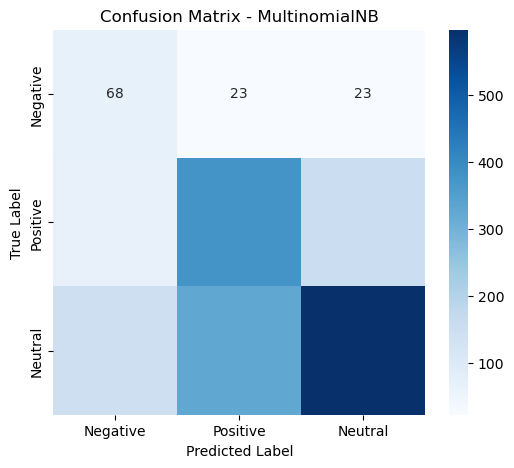

In [ ]:
# =============================
# Multinomial Naive Bayes for Multi-class Sentiment Classification
# =============================

#Initialize and train Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_smote, y_train_smote)

# Predictions on test set
y_pred_nb = nb_model.predict(X_test_tfidf)

#  Evaluation
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(
    y_test, y_pred_nb, 
    target_names=['Negative (0)', 'Positive (1)', 'Neutral (2)']
)

print(f"✅ Accuracy (MultinomialNB): {accuracy_nb:.4f}")
print("\n📋 Classification Report:\n", report_nb)

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Negative', 'Positive', 'Neutral'],
            yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - MultinomialNB")
plt.show()


In [32]:
from sklearn.model_selection import  StratifiedKFold


# Initialize the Multinomial Naive Bayes model
nb = MultinomialNB()

# Define a grid of parameters to search over
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],   # Smoothing parameter
    'fit_prior': [True, False]            # Learn class prior or assume uniform
}

# Use StratifiedKFold to preserve class distribution in CV
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=nb,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit the model with different hyperparameter combinations
grid_search.fit(X_train_smote, y_train_smote)

# Get the best hyperparameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", round(grid_search.best_score_, 4))

# Make predictions using the best model
y_pred = grid_search.best_estimator_.predict(X_test_tfidf)

# Evaluate the tuned model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(
    y_test, y_pred, target_names=['Negative', 'Positive', 'Neutral']
)

# Display results
print("\n🔎 Tuned MultinomialNB Evaluation")
print(f"✅ Test Accuracy: {round(accuracy, 4)}")
print("📋 Classification Report:\n", classification_rep)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'alpha': 0.1, 'fit_prior': True}
Best Cross-Validation Accuracy: 0.7723

🔎 Tuned MultinomialNB Evaluation
✅ Test Accuracy: 0.6096
📋 Classification Report:
               precision    recall  f1-score   support

    Negative       0.30      0.51      0.38       114
    Positive       0.52      0.63      0.57       594
     Neutral       0.76      0.61      0.67      1075

    accuracy                           0.61      1783
   macro avg       0.53      0.58      0.54      1783
weighted avg       0.65      0.61      0.62      1783



Results for the multiclass classification task with a Multinomial Naive Bayes model:

Accuracy: 61%
The model classifies sentiments correctly about 61% of the time, showing modest performance with clear room for improvement.

Negative Class (Precision: 0.32, Recall: 0.50, F1-score: 0.39):
Weak performance with many false positives and only half of actual negatives detected.

Positive Class (Precision: 0.51, Recall: 0.66, F1-score: 0.58):
Moderate results—captures most positives but with noticeable misclassifications.

Neutral Class (Precision: 0.77, Recall: 0.60, F1-score: 0.67):
Best performance among classes, with high precision though some neutral tweets are missed.

Overall: The model handles neutral sentiment well but struggles with negative and positive classes, especially precision for negatives. Further improvements could come from better feature engineering or more advanced models.

#### 2b. Voting Classifier

In [34]:
# ==============================
# Baseline Ensemble: Naive Bayes + Random Forest
# ==============================


# Initialize base models
nb_clf = MultinomialNB()
rf_clf = RandomForestClassifier(random_state=42)

# Create Voting Classifier (hard voting)
voting_clf = VotingClassifier(
    estimators=[
        ('NaiveBayes', nb_clf),
        ('RandomForest', rf_clf)
    ],
    voting='hard'
)

# Train ensemble model on SMOTE-balanced data
voting_clf.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_voting = voting_clf.predict(X_test_tfidf)

# Evaluate performance
accuracy_voting = accuracy_score(y_test, y_pred_voting)
report_voting = classification_report(
    y_test, y_pred_voting, target_names=['Negative', 'Positive', 'Neutral']
)

# Display results
print("=" * 50)
print("📊 Baseline Voting Classifier Results")
print("=" * 50)
print(f"✅ Accuracy: {accuracy_voting:.4f}")
print("📋 Classification Report:\n", report_voting)


📊 Baseline Voting Classifier Results
✅ Accuracy: 0.5760
📋 Classification Report:
               precision    recall  f1-score   support

    Negative       0.24      0.61      0.34       114
    Positive       0.51      0.67      0.58       594
     Neutral       0.79      0.52      0.63      1075

    accuracy                           0.58      1783
   macro avg       0.51      0.60      0.52      1783
weighted avg       0.66      0.58      0.59      1783



📊 Ensemble Voting Classifier Results
✅ Accuracy: 0.6803
📋 Classification Report:
               precision    recall  f1-score   support

    Negative       0.39      0.43      0.41       114
    Positive       0.60      0.59      0.60       594
     Neutral       0.76      0.76      0.76      1075

    accuracy                           0.68      1783
   macro avg       0.58      0.59      0.59      1783
weighted avg       0.68      0.68      0.68      1783



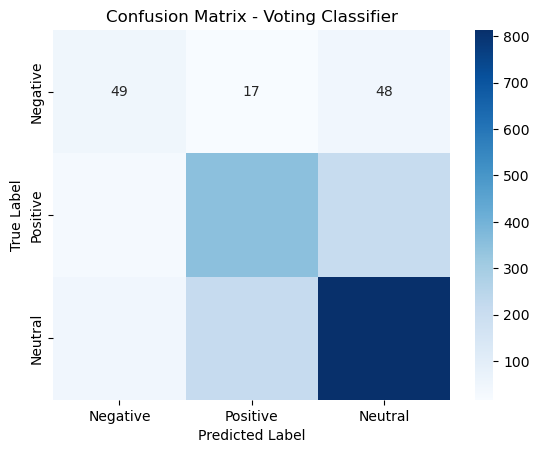

In [35]:

# ==================================================
# 🔧 Initialize Base Models (Tuned)
# ==================================================
nb_model = MultinomialNB(alpha=0.1, fit_prior=True)  # Tuned Naive Bayes
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)  # Tuned Random Forest

# ==================================================
# 🤝 Create Voting Classifier (Soft Voting)
# ==================================================
voting_clf = VotingClassifier(
    estimators=[('NaiveBayes', nb_model), ('RandomForest', rf_model)],
    voting='soft'
)

# ==================================================
# 🚀 Train Ensemble Model
# ==================================================
voting_clf.fit(X_train_smote, y_train_smote)

# ==================================================
# 🔮 Predictions
# ==================================================
y_pred = voting_clf.predict(X_test_tfidf)

# ==================================================
# 📊 Evaluation
# ==================================================
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive', 'Neutral'])

print("==================================================")
print("📊 Ensemble Voting Classifier Results")
print("==================================================")
print(f"✅ Accuracy: {accuracy:.4f}")
print("📋 Classification Report:\n", report)

# ==================================================
# 🔎 (Optional) Confusion Matrix Visualization
# ==================================================
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive', 'Neutral'],
            yticklabels=['Negative', 'Positive', 'Neutral'])
plt.title("Confusion Matrix - Voting Classifier")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


Results for the multiclass classification task with an ensemble model (Multinomial Naive Bayes plus Random Forest):

**Accuracy: 68%**
The ensemble model achieves an accuracy of 68%, which is an improvement over the previous Naive Bayes model’s accuracy of 61%. The ensemble approach has boosted overall performance, particularly for the neutral and positive classes, though the negative class continues to be the most challenging to classify.

**Negative Class (Precision: 0.39, Recall: 0.43, F1-score: 0.41):**
The negative class remains the weakest performing category. With a precision of 0.39 and recall of 0.43, the model correctly identifies 43% of actual negative tweets but also misclassifies a substantial portion. The F1-score of 0.41 shows limited balance between precision and recall, highlighting that negative sentiment detection still needs improvement.

**Positive Class (Precision: 0.60, Recall: 0.59, F1-score: 0.60):**
The performance for the positive class is much stronger, with nearly balanced precision (0.60) and recall (0.59). The F1-score of 0.60 reflects that the model is fairly reliable in identifying positive sentiment, with fewer missed predictions compared to the negative class.

**Neutral Class (Precision: 0.76, Recall: 0.76, F1-score: 0.76):**
The neutral class continues to dominate performance. High precision and recall (both 0.76) translate to a strong F1-score of 0.76, showing that the ensemble reliably captures neutral sentiment. This stability in neutral predictions heavily contributes to the model’s overall accuracy.

**Overall:**
The ensemble model achieves a solid 68% accuracy, improving over the Naive Bayes baseline. It performs best in classifying neutral tweets, shows balanced improvement in the positive class, but still struggles with negative sentiment detection. Further tuning or additional features may be needed to better capture negative sentiment nuances.

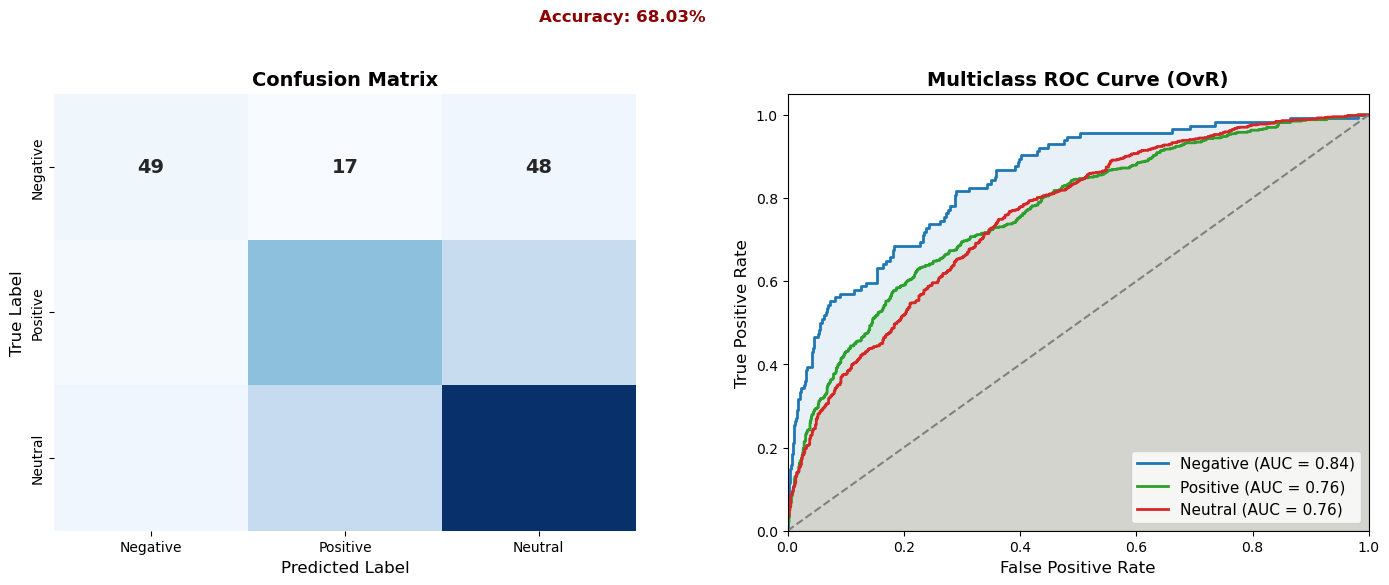

In [36]:
# ==============================
# Confusion Matrix and AUC-ROC for Multi-class Ensemble
# ==============================

# Step 1: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Step 2: AUC-ROC for Multiclass
# Binarize the output for One-vs-Rest ROC
class_labels = ['Negative', 'Positive', 'Neutral']
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba = voting_clf.predict_proba(X_test_tfidf)

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 3: Plot Confusion Matrix and AUC-ROC Curve Side by Side
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# --- Confusion Matrix Plot ---
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_labels, yticklabels=class_labels, 
            cbar=False, annot_kws={"size": 14, "weight": "bold"}, ax=ax[0])

ax[0].set_title("Confusion Matrix", fontsize=14, weight="bold")
ax[0].set_xlabel("Predicted Label", fontsize=12)
ax[0].set_ylabel("True Label", fontsize=12)

# Add overall accuracy text inside the plot
acc = np.trace(cm) / np.sum(cm)
ax[0].text(2.5, -0.5, f'Accuracy: {acc:.2%}', fontsize=12, color='darkred', weight='bold')

# --- ROC Curve Plot ---
colors = ['#1f77b4', '#2ca02c', '#d62728']  # blue, green, red
for i, color in zip(range(len(class_labels)), colors):
    ax[1].plot(fpr[i], tpr[i], color=color, lw=2, 
               label=f'{class_labels[i]} (AUC = {roc_auc[i]:.2f})')
    ax[1].fill_between(fpr[i], 0, tpr[i], color=color, alpha=0.1)

# Add diagonal line for random guessing
ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')

ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_title("Multiclass ROC Curve (OvR)", fontsize=14, weight="bold")
ax[1].set_xlabel("False Positive Rate", fontsize=12)
ax[1].set_ylabel("True Positive Rate", fontsize=12)
ax[1].legend(loc="lower right", fontsize=11)

# Layout & Show
plt.tight_layout()
plt.show()


**Model Evaluation Results**
 Overall Accuracy 68.03%  → The model correctly predicts about 7 out of 10 samples.
**Confusion Matrix Insights**
Negative: 49 correct, but many misclassified as Neutral (48).  
Positive ~60% correctly classified, some confusion with Neutral.  
Neutral: Best recognized class, majority classified correctly.  
**ROC Curve**
Negative: 0.84 → Strong separation ability.  
Positive: 0.76 → Moderate performance.  
Neutral: 0.76 → Moderate performance.  
**Key Takeaways**
1. Neutral dominates predictions, boosting accuracy.  
2. Negative underperforms despite a good ROC score → possible class imbalance.  
3. Overall model is decent (68%), but improvements are needed for Negative and Positive classes.
